In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('max_colwidth', 80)


In [3]:
cloc = pd.read_csv("cloc_summary.csv")
coupling = pd.read_csv("coupling_summary2.csv")
eeffort = pd.read_csv("entity_efforts_summary2.csv")
revisions_cloc = pd.read_csv("revisions_cloc.csv")
revisions = pd.read_csv("revisions_summary2.csv")
soc = pd.read_csv("soc_summary2.csv")

In [4]:
cloc = cloc[cloc["language"] == 'Java']
cloc = cloc[["filename", "blank", "comment", "code"]]
cloc["filename"] = cloc["filename"].apply(lambda x: x.split("it\\trm\\")[-1])
cloc.head()

,filename,blank,comment,code
0,taskmanager\DBContext.java,860.0,247.0,4049.0
1,taskmanager\models\compositetask\genericsubtask\ImmutableCreateServiceInstan...,149.0,508.0,2420.0
2,taskmanager\models\compositetask\genericsubtask\ImmutableCreateWorkerSetSubT...,153.0,519.0,2403.0
3,taskmanager\models\compositetask\genericsubtask\ImmutableCreateServiceInstan...,135.0,464.0,2051.0
4,businesslogic\platform\cf\CFPlatformContext.java,374.0,293.0,2045.0


In [5]:
coupling.columns = ["filename", "coupled", "degree", "avg-rev"]
coupling["filename"] = coupling["filename"].apply(lambda x: x.split("it/trm/")[-1])
coupling["coupled"] = coupling["coupled"].apply(lambda x: x.split("it/trm/")[-1])
coupling.head()

,filename,coupled,degree,avg-rev
0,businesslogic/platform/cf/CFPlatformContext.java,taskmanager/DBContext.java,30,88
1,businesslogic/commons/Consts.java,businesslogic/platform/cf/CFPlatformContext.java,37,75
2,businesslogic/delegateimplementations/TenantsApiDelegateImpl.java,taskmanager/DBContext.java,30,71
3,businesslogic/platform/IPlatformContext.java,businesslogic/platform/cf/CFPlatformContext.java,47,53
4,DummyImplementations/DummyCFContext.java,businesslogic/platform/cf/CFPlatformContext.java,34,52


In [6]:
eeffort.columns = ["filename", "author", "author-rev", "total-rev"]
eeffort["filename"] = eeffort["filename"].apply(lambda x: x.split("it/trm/")[-1])
eeffort.head()

,filename,author,author-rev,total-rev
0,annotations/immutables/AllowNulls.java,Surabhi Gupta,2,3
1,annotations/immutables/AllowNulls.java,Vinit Kumar,1,3
2,annotations/immutables/Nullable.java,Surabhi Gupta,2,3
3,annotations/immutables/Nullable.java,Vinit Kumar,1,3
4,annotations/immutables/QueryParameter.java,Surabhi Gupta,1,1


In [7]:
revisions_cloc.columns = ["filename", "rev", "code"]
revisions_cloc["filename"] = revisions_cloc["filename"].apply(lambda x: x.split("it\\trm\\")[-1])
revisions_cloc.head()

,filename,rev,code
0,taskmanager\DBContext.java,107.0,4049.0
1,businesslogic\platform\cf\CFPlatformContext.java,93.0,2045.0
2,businesslogic\commons\Consts.java,75.0,192.0
3,businesslogic\delegateimplementations\TenantsApiDelegateImpl.java,62.0,863.0
4,taskmanager\models\compositetask\tenantprovision\mastertask\CreateTenantTask...,61.0,669.0


In [8]:
revisions.columns = ["filename", "rev"]
revisions["filename"] = revisions_cloc["filename"].apply(lambda x: x.split("it/trm/")[-1])
revisions.head()

,filename,rev
0,taskmanager\DBContext.java,107
1,businesslogic\platform\cf\CFPlatformContext.java,93
2,businesslogic\commons\Consts.java,75
3,businesslogic\delegateimplementations\TenantsApiDelegateImpl.java,62
4,taskmanager\models\compositetask\tenantprovision\mastertask\CreateTenantTask...,61


In [9]:
soc.columns = ["filename", "soc"]
soc["filename"] = soc["filename"].apply(lambda x: x.split("it/trm/")[-1])
soc.head()

,filename,soc
0,taskmanager/DBContext.java,672
1,businesslogic/platform/cf/CFPlatformContext.java,630
2,taskmanager/models/compositetask/tenantprovision/mastertask/CreateTenantTask...,436
3,businesslogic/commons/Consts.java,406
4,businesslogic/delegateimplementations/TenantsApiDelegateImpl.java,332


In [11]:
def barplot(data, y, x, title=""):
    data_col = data.sort_values(by=y, ascending=False).head(15)
    data_col_plot = pd.Series(data=data_col[y].values, index=data_col[x])

    plt.figure(figsize=(4,8))
    data_col_plot.plot(kind='barh', fontsize=15)
    plt.title(title)
    plt.show()

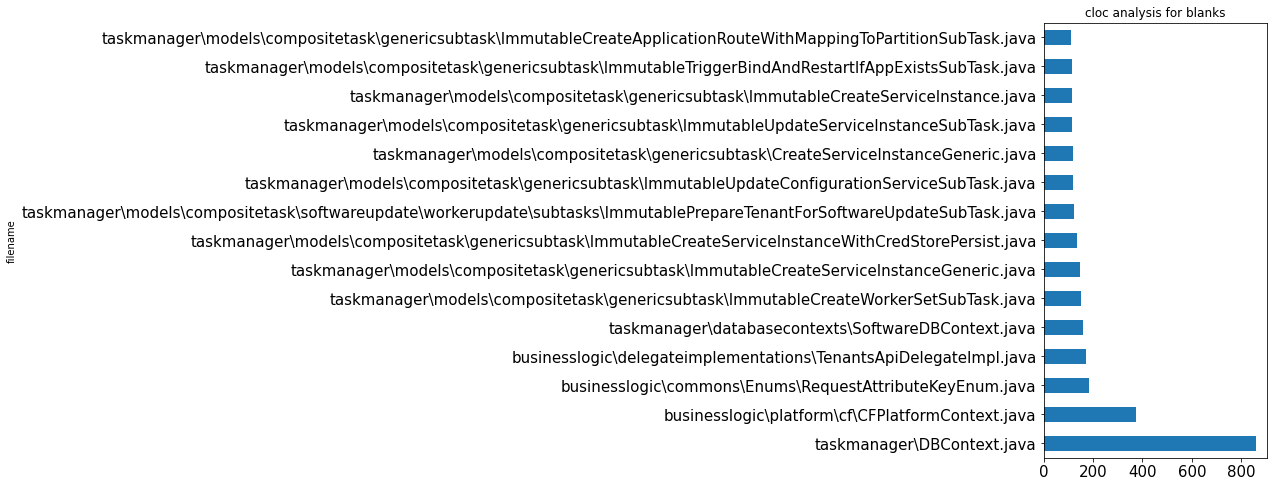

In [12]:
barplot(cloc, "blank", "filename", "cloc analysis for blanks")

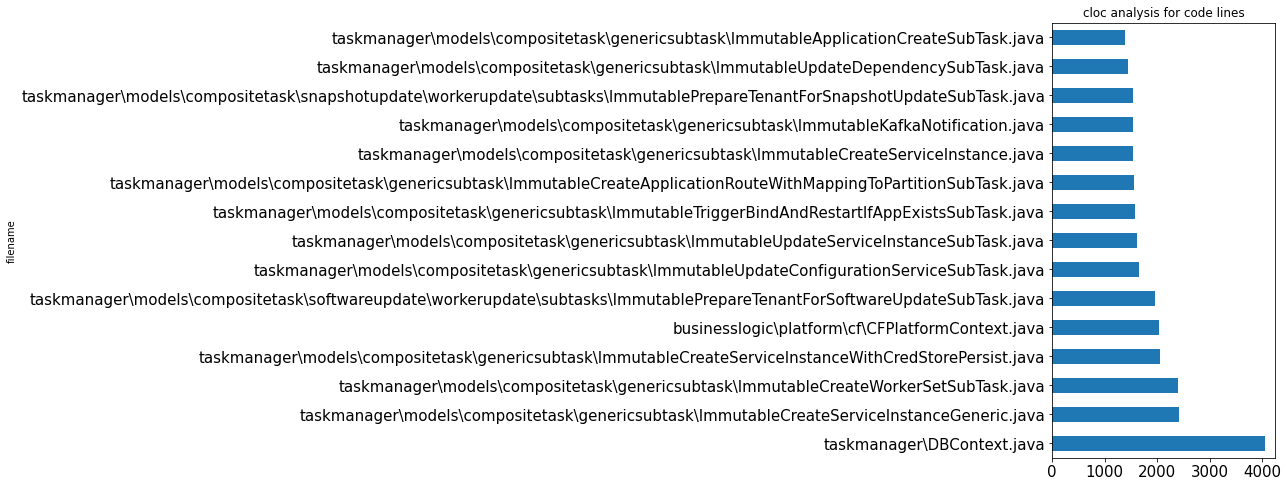

In [13]:
barplot(cloc, "code", "filename", title="cloc analysis for code lines")

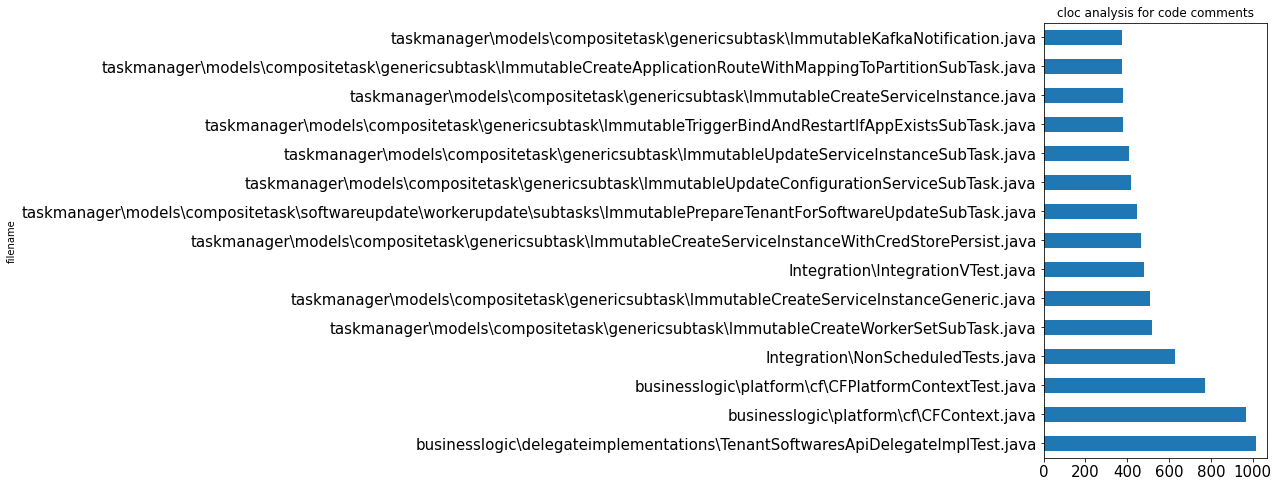

In [14]:
barplot(cloc, "comment", "filename", title="cloc analysis for code comments")

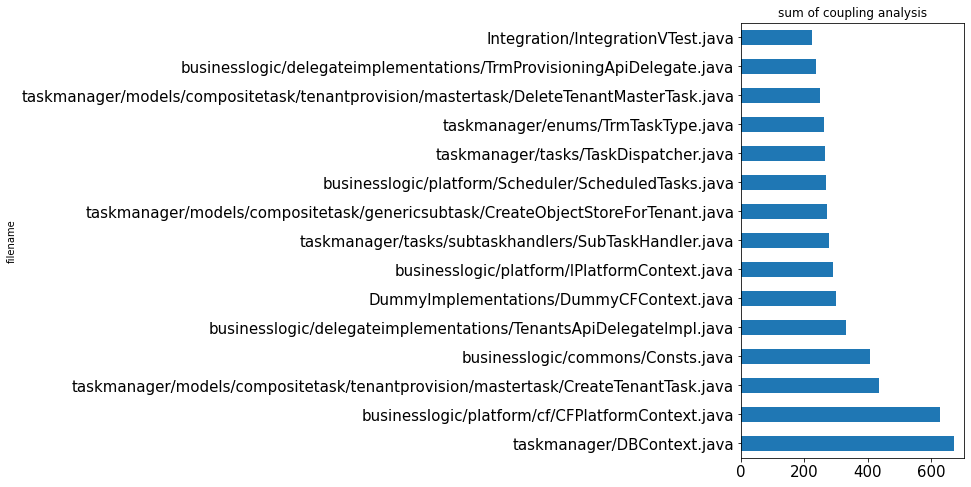

In [15]:
barplot(soc, "soc", "filename", "sum of coupling analysis")

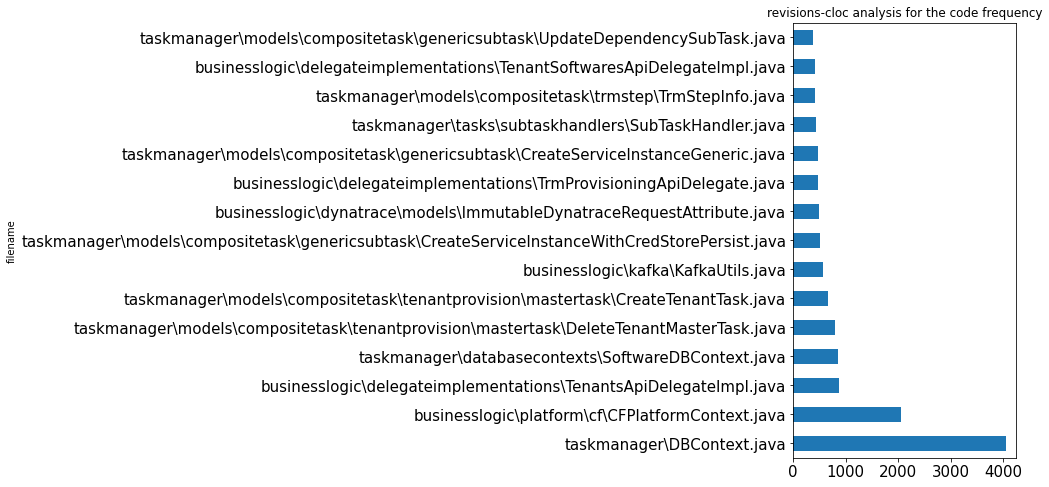

In [16]:
barplot(revisions_cloc, "code", "filename", "revisions-cloc analysis for the code frequency")

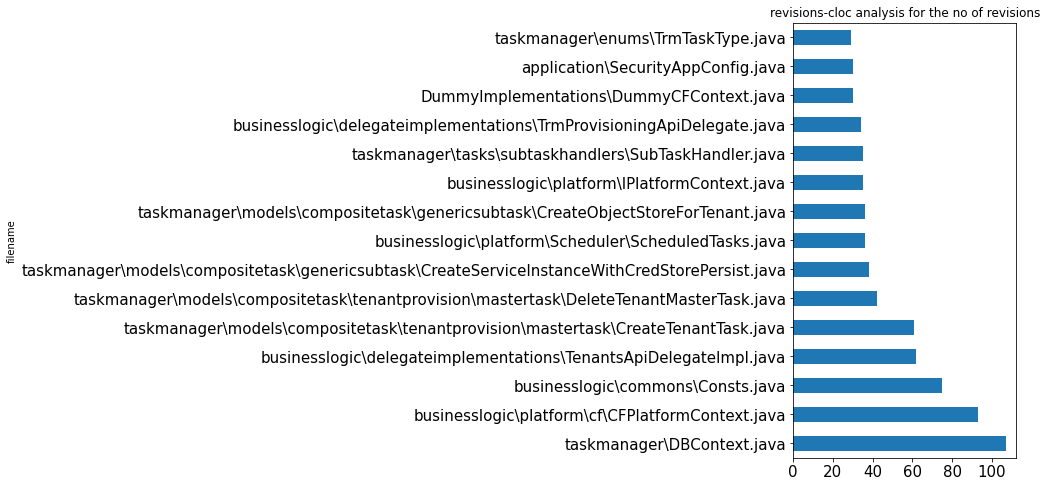

In [17]:
barplot(revisions_cloc, "rev", "filename", "revisions-cloc analysis for the no of revisions")

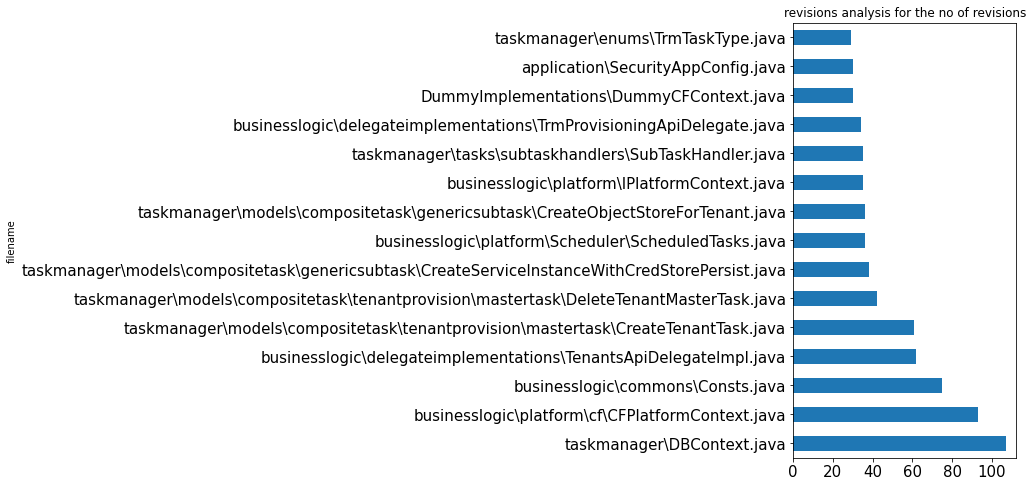

In [18]:
barplot(revisions, "rev", "filename", "revisions analysis for the no of revisions")

In [ ]:
# coupling.sort_values(by="degree", ascending=False)[["filename", "degree", "avg-rev"]].head(15)

# data_col_plot = pd.Series(data=coupling_sorted["avg-rev"].values, index=coupling_sorted["filename"])

# plt.figure(figsize=(4,8))
# data_col_plot.plot(kind='barh', fontsize=15)
# plt.title("coupling analysis for avg-rev")
# plt.show()


In [19]:
coupling.sort_values(by="degree", ascending=False)[["filename", "coupled", "degree", "avg-rev"]].head(15)


,filename,coupled,degree,avg-rev
88,DummyImplementations/DummyCreateObjectStoreForTenant.java,DummyImplementations/DummyCreateObjectStoreForTenantTaskHandler.java,90,6
84,taskmanager/models/compositetask/genericsubtask/ApplicationRestage.java,taskmanager/models/compositetask/genericsubtask/ApplicationRestart.java,87,8
89,businesslogic/platform/cf/utils/cis/CommercialInfrastructure.java,businesslogic/platform/cf/utils/cis/CommercialInfrastructureTest.java,83,6
78,taskmanager/tasks/DeleteApplicationTaskHandler.java,taskmanager/tasks/DeleteRouteTaskHandler.java,82,9
64,taskmanager/tasks/CreateApplicationTaskHandler.java,taskmanager/tasks/DeleteApplicationTaskHandler.java,78,12
80,taskmanager/models/compositetask/genericsubtask/CreateApplicationRouteWithMa...,taskmanager/models/compositetask/genericsubtask/CreateServiceInstance.java,77,9
79,taskmanager/models/compositetask/genericsubtask/CreateApplicationRouteWithMa...,taskmanager/models/compositetask/genericsubtask/CreateRoute.java,77,9
86,DummyImplementations/DummyCreateObjectStoreForTenantTaskHandler.java,DummyImplementations/DummyKafkaPublisher.java,76,7
68,taskmanager/tasks/CreateRouteTaskHandler.java,taskmanager/tasks/DeleteRouteTaskHandler.java,76,11
69,taskmanager/tasks/CreateRouteTaskHandler.java,taskmanager/tasks/DeleteApplicationTaskHandler.java,72,11


In [20]:
coupling.sort_values(by="avg-rev", ascending=False)[["filename", "coupled", "degree", "avg-rev"]].head(15)


,filename,coupled,degree,avg-rev
0,businesslogic/platform/cf/CFPlatformContext.java,taskmanager/DBContext.java,30,88
1,businesslogic/commons/Consts.java,businesslogic/platform/cf/CFPlatformContext.java,37,75
2,businesslogic/delegateimplementations/TenantsApiDelegateImpl.java,taskmanager/DBContext.java,30,71
3,businesslogic/platform/IPlatformContext.java,businesslogic/platform/cf/CFPlatformContext.java,47,53
4,DummyImplementations/DummyCFContext.java,businesslogic/platform/cf/CFPlatformContext.java,34,52
5,businesslogic/commons/Consts.java,businesslogic/platform/IPlatformContext.java,32,47
6,taskmanager/models/compositetask/tenantprovision/mastertask/CreateTenantTask...,taskmanager/models/compositetask/tenantprovision/mastertask/DeleteTenantMast...,36,41
7,taskmanager/models/compositetask/genericsubtask/CreateObjectStoreForTenant.java,taskmanager/models/compositetask/tenantprovision/mastertask/CreateTenantTask...,31,38
8,taskmanager/models/compositetask/tenantprovision/mastertask/CreateTenantTask...,taskmanager/tasks/TaskDispatcher.java,32,34
9,taskmanager/models/compositetask/genericsubtask/CreateObjectStoreForTenant.java,taskmanager/models/compositetask/genericsubtask/CreateServiceInstanceWithCre...,48,27
